<a href="https://colab.research.google.com/github/20hnu/ml_projects/blob/main/Sentiment_Analysis_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPool1D,Conv1D, LSTM
from keras.layers import Embedding
from sklearn.model_selection import train_test_split

In [5]:
movie_reviews = pd.read_csv("/content/a1_IMDB_Dataset.csv")

In [7]:
movie_reviews.shape

(50000, 2)

In [8]:
movie_reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
movie_reviews.isnull().values.any()

False

<Axes: xlabel='sentiment', ylabel='count'>

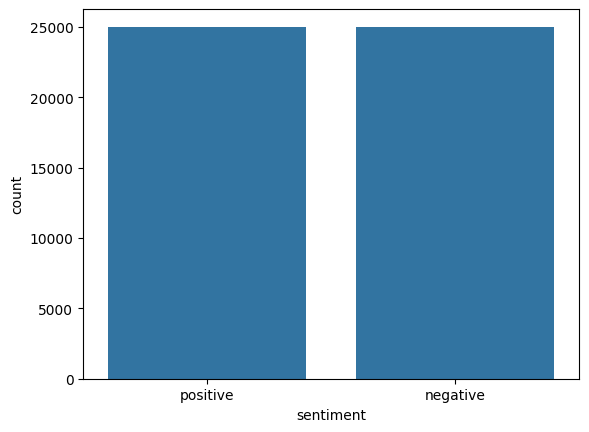

In [11]:
import seaborn as sns
sns.countplot(x="sentiment", data =movie_reviews)

In [13]:
movie_reviews["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [14]:
movie_reviews["review"][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [15]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
  return TAG_RE.sub('', text)

In [17]:
remove_tags(movie_reviews["review"][2])

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
def preprocess_text(sen):
  sentence = sen.lower()
  sentence = remove_tags(sentence)
  sentence = re.sub('[^a-zA-Z]',' ',sentence)
  sentence = re.sub(r'\s+[a-zA-Z]\s+',' ',sentence)
  sentence = re.sub(r'\s+',' ',sentence)

  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  sentence = pattern.sub('', sentence)

  return sentence

In [20]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
  X.append(preprocess_text(sen))

In [21]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [22]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [23]:
y_train

array([0, 0, 1, ..., 0, 1, 1])

In [24]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)


In [25]:
X_train[1]

[27,
 317,
 1,
 22,
 27,
 317,
 1,
 2116,
 148,
 54,
 188,
 395,
 1293,
 136,
 404,
 54,
 406,
 506,
 3453,
 290,
 4,
 3748,
 24,
 1480,
 611,
 11609,
 13005,
 1943,
 1480,
 461,
 3748,
 101,
 320,
 11609,
 13005,
 217,
 377,
 137,
 15,
 185,
 299,
 33,
 83,
 1216,
 569,
 1130,
 15681,
 11609,
 3,
 46,
 62,
 11609,
 219,
 11815,
 1343,
 3943,
 17437,
 533,
 6265,
 107,
 484,
 1919,
 1130,
 15681,
 562,
 37,
 140,
 506,
 110,
 13301,
 98,
 9,
 46,
 1146,
 574,
 1527,
 1426,
 3571,
 153,
 446,
 399,
 46,
 1547,
 1200,
 318,
 4471,
 8852,
 1946,
 294,
 28,
 60,
 19950,
 26,
 4554,
 2370,
 1426,
 734,
 28,
 514,
 13924,
 11609,
 88,
 286,
 423,
 4200,
 11393,
 1673,
 461,
 2270,
 299,
 185,
 1130,
 143,
 936,
 28,
 34,
 10,
 10489,
 26,
 1,
 503,
 4666,
 949,
 6602,
 418,
 150,
 2270,
 767,
 101,
 49,
 574,
 7018,
 479,
 334,
 116,
 919,
 1,
 22,
 1545,
 27]

In [27]:
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

92394

In [29]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding="post", maxlen=maxlen)

In [30]:
embedding_dictionary = dict()
glove_file = open('/content/drive/MyDrive/a2_glove.6B.100d.txt', encoding='utf8')

for line in glove_file:
  records = line.split()
  word=records[0]
  vector_dimensions = np.asarray(records[1:], dtype='float32')
  embedding_dictionary[word] = vector_dimensions

glove_file.close()

In [31]:
embedding_matrix = np.zeros((vocab_length,100))
for word, index in word_tokenizer.word_index.items():
  embedding_vector = embedding_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

In [32]:
embedding_matrix.shape

(92394, 100)

##Simple Neural Network

In [33]:
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix],input_length=maxlen, trainable=False)
snn_model.add(embedding_layer)
snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

In [34]:
snn_model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['acc'])
snn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9239400   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 9249401 (35.28 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________


In [35]:
snn_model_history = snn_model.fit(X_train, y_train, batch_size = 128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
250/250 [==============================] - 3s 7ms/step - loss: 0.5631 - acc: 0.7070 - val_loss: 0.5020 - val_acc: 0.7615
Epoch 2/6
250/250 [==============================] - 2s 9ms/step - loss: 0.4489 - acc: 0.7955 - val_loss: 0.4946 - val_acc: 0.7684
Epoch 3/6
250/250 [==============================] - 3s 10ms/step - loss: 0.4134 - acc: 0.8160 - val_loss: 0.5027 - val_acc: 0.7656
Epoch 4/6
250/250 [==============================] - 2s 9ms/step - loss: 0.3913 - acc: 0.8274 - val_loss: 0.5142 - val_acc: 0.7595
Epoch 5/6
250/250 [==============================] - 1s 6ms/step - loss: 0.3761 - acc: 0.8348 - val_loss: 0.5192 - val_acc: 0.7595
Epoch 6/6
250/250 [==============================] - 1s 6ms/step - loss: 0.3627 - acc: 0.8435 - val_loss: 0.5378 - val_acc: 0.7594


In [36]:
score = snn_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.5623 - acc: 0.7489


In [37]:
score[0] #score

0.5623303055763245

In [38]:
score[1] #accuracy

0.7488999962806702

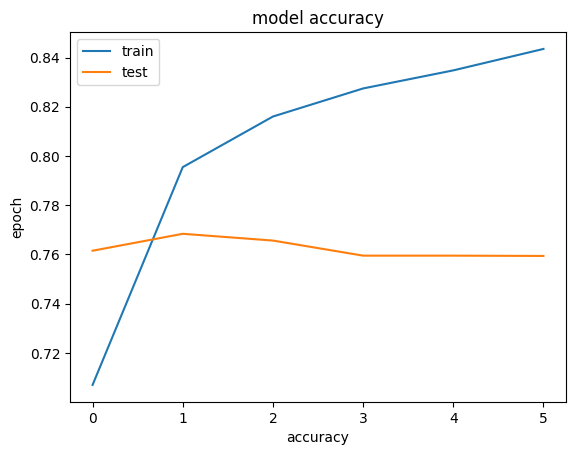

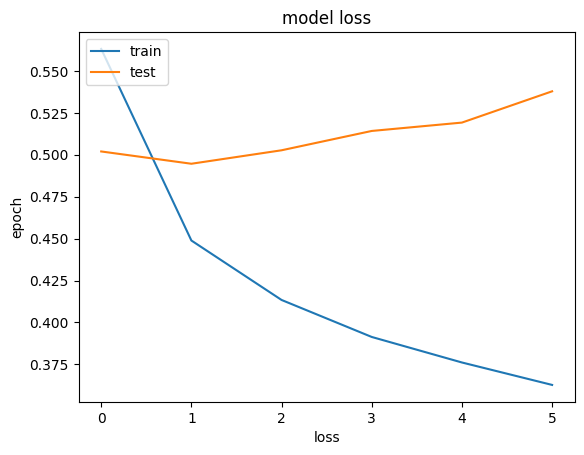

In [40]:
import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])


plt.title("model accuracy")
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title("model loss")
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## CNN

In [ ]:
from keras.layers import Conv1D

In [41]:
cnn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix],input_length=maxlen, trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128,5,activation='relu'))
cnn_model.add(GlobalMaxPool1D())
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9303657 (35.49 MB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________


In [42]:
model = cnn_model.fit(X_train, y_train,  batch_size = 128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 47s 184ms/step - loss: 0.4884 - acc: 0.7644 - val_loss: 0.3891 - val_acc: 0.8285
Epoch 2/6
250/250 [==============================] - 36s 143ms/step - loss: 0.3466 - acc: 0.8513 - val_loss: 0.3519 - val_acc: 0.8455
Epoch 3/6
250/250 [==============================] - 30s 118ms/step - loss: 0.2907 - acc: 0.8834 - val_loss: 0.3373 - val_acc: 0.8519
Epoch 4/6
250/250 [==============================] - 41s 163ms/step - loss: 0.2462 - acc: 0.9064 - val_loss: 0.3338 - val_acc: 0.8549
Epoch 5/6
250/250 [==============================] - 48s 193ms/step - loss: 0.2050 - acc: 0.9290 - val_loss: 0.3320 - val_acc: 0.8560
Epoch 6/6
250/250 [==============================] - 37s 148ms/step - loss: 0.1687 - acc: 0.9485 - val_loss: 0.3472 - val_acc: 0.8496


In [45]:
cnn_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 5s 17ms/step - loss: 0.3458 - acc: 0.8510


[0.3457917869091034, 0.8510000109672546]

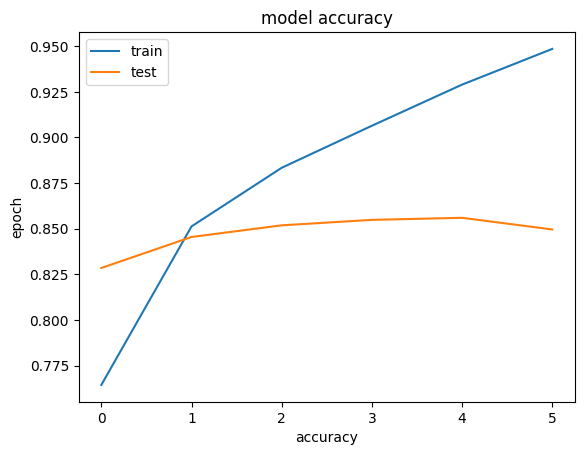

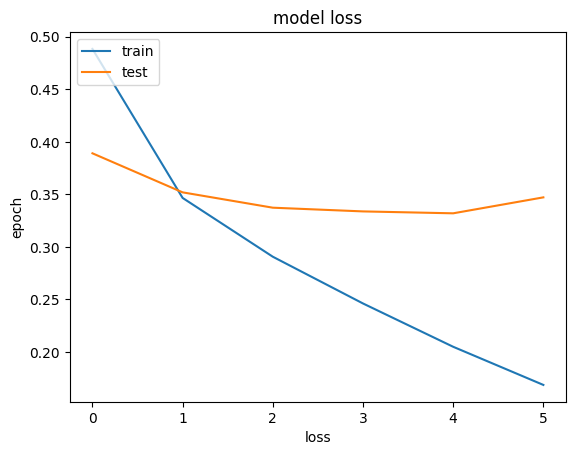

In [46]:
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])


plt.title("model accuracy")
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])

plt.title("model loss")
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

##LSTM

In [47]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix],input_length=maxlen, trainable=False)
lstm_model.add(embedding_layer)

lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9356777 (35.69 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________


In [48]:
lstm_model_history = lstm_model.fit(X_train, y_train,  batch_size = 128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 89s 349ms/step - loss: 0.4877 - acc: 0.7648 - val_loss: 0.4216 - val_acc: 0.8146
Epoch 2/6
250/250 [==============================] - 100s 402ms/step - loss: 0.4124 - acc: 0.8156 - val_loss: 0.3717 - val_acc: 0.8388
Epoch 3/6
250/250 [==============================] - 89s 357ms/step - loss: 0.3821 - acc: 0.8347 - val_loss: 0.3574 - val_acc: 0.8494
Epoch 4/6
250/250 [==============================] - 89s 357ms/step - loss: 0.3495 - acc: 0.8520 - val_loss: 0.3350 - val_acc: 0.8556
Epoch 5/6
250/250 [==============================] - 90s 360ms/step - loss: 0.3235 - acc: 0.8640 - val_loss: 0.3499 - val_acc: 0.8521
Epoch 6/6
250/250 [==============================] - 91s 364ms/step - loss: 0.3175 - acc: 0.8678 - val_loss: 0.3226 - val_acc: 0.8627


In [49]:
lstm_model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 20s 62ms/step - loss: 0.3233 - acc: 0.8627


[0.3232748806476593, 0.8626999855041504]

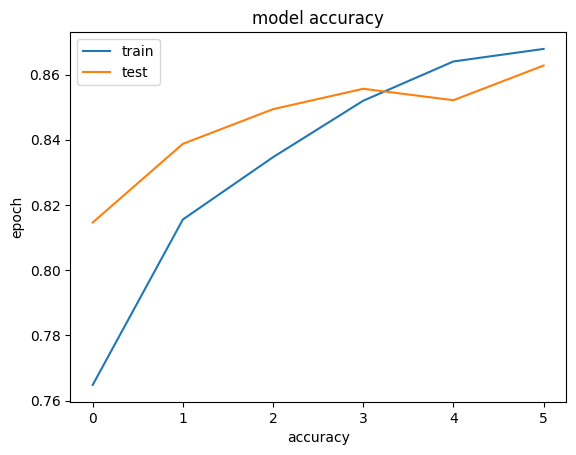

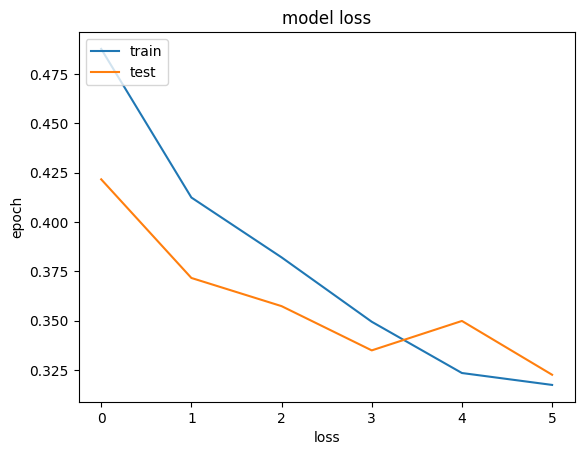

In [50]:
plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])


plt.title("model accuracy")
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title("model loss")
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [51]:
lstm_model.save(f"./cl_lstm_model_acc_{round(score[1],3)}.h5", save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
sample_reviews = pd.read_csv('/content/a3_IMDb_Unseen_Reviews.csv')
sample_reviews.head(5)

,Unnamed: 0,Movie,Review Text,IMDb Rating
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3
3,3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1
4,4,Eternals,Amazing visuals and philosophical concepts!\n\...,10


In [58]:
sample_reviews.shape

(6, 4)

In [54]:
unseen_reviews = sample_reviews['Review Text']
unseen_processed =[]

for review in unseen_reviews:
  review = preprocess_text(review)
  unseen_processed.append(review)



In [56]:
unseen_tokenized = word_tokenizer.texts_to_sequences(unseen_processed)
unseen_padded = pad_sequences(unseen_tokenized, padding="post", maxlen=maxlen)

In [57]:
unseen_sentiments = lstm_model.predict(unseen_padded)
unseen_sentiments

1/1 [==============================] - 1s 678ms/step


array([[0.92714435],
       [0.99152714],
       [0.2930576 ],
       [0.3521449 ],
       [0.9775412 ],
       [0.07221781]], dtype=float32)

In [59]:
sample_reviews['Predicted Sentiments'] = np.round(unseen_sentiments*10,1)



In [64]:
dfx = sample_reviews.copy()

In [65]:
dfx.columns

Index(['Unnamed: 0', 'Movie', 'Review Text', 'IMDb Rating',
       'Predicted Sentiments'],
      dtype='object')

In [67]:
dfx.drop(["Unnamed: 0"], axis=1, inplace=True)

In [68]:
dfx

,Movie,Review Text,IMDb Rating,Predicted Sentiments
0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9,9.3
1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10,9.9
2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3,2.9
3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1,3.5
4,Eternals,Amazing visuals and philosophical concepts!\n\...,10,9.8
5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3,0.7


In [69]:
dfx["Predicted Sentiments"] = np.array(list(map(lambda x: "Positive" if x>0.7 else "Negative", dfx["Predicted Sentiments"])))

In [70]:
dfx

,Movie,Review Text,IMDb Rating,Predicted Sentiments
0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9,Positive
1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10,Positive
2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3,Positive
3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1,Positive
4,Eternals,Amazing visuals and philosophical concepts!\n\...,10,Positive
5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3,Negative
